<a href="https://colab.research.google.com/github/prernac-dotcom/image_processing/blob/main/Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

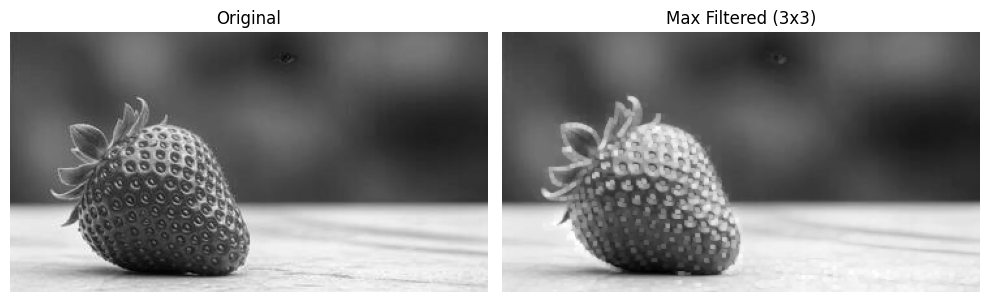

In [ ]:
# Applies a 3×3 maximum filter to an image by replacing each pixel with the max of its neighborhood
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter

A = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)


B = maximum_filter(A, size=(3, 3))


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(A, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(B, cmap='gray'), plt.title('Max Filtered (3x3)'), plt.axis('off')
plt.tight_layout()
plt.show()


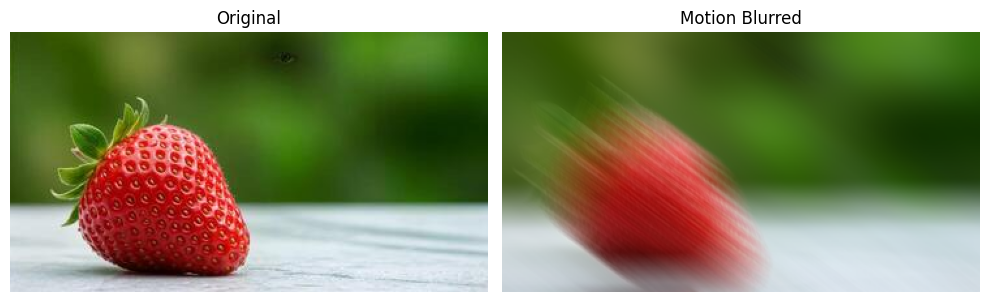

In [ ]:
# Applies motion blur using a custom kernel and symmetric border handling
import cv2
import numpy as np
import matplotlib.pyplot as plt

A = cv2.imread('1.jpg')
A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

def motion_blur_kernel(length, angle):
    k = np.zeros((length, length))
    angle_rad = np.deg2rad(angle)
    x_center = length // 2
    for i in range(length):
        offset = int((i - x_center) * np.tan(angle_rad))
        x = x_center + offset
        if 0 <= x < length:
            k[i, x] = 1
    k /= np.sum(k)
    return k

kernel = motion_blur_kernel(50, 54)
B = cv2.filter2D(A, -1, kernel, borderType=cv2.BORDER_REFLECT)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(A), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(B), plt.title('Motion Blurred'), plt.axis('off')
plt.tight_layout()
plt.show()


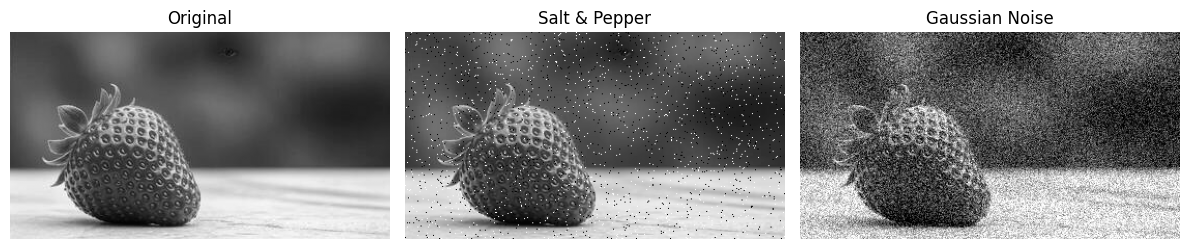

In [ ]:
# Adds salt & pepper and Gaussian noise to a grayscale image and displays the results
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

I = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)

Isp = random_noise(I, mode='s&p', amount=0.03)
Isp = (Isp * 255).astype(np.uint8)

Ig = random_noise(I, mode='gaussian', var=0.02)
Ig = (Ig * 255).astype(np.uint8)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(I, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(Isp, cmap='gray'), plt.title('Salt & Pepper'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(Ig, cmap='gray'), plt.title('Gaussian Noise'), plt.axis('off')
plt.tight_layout()
plt.show()


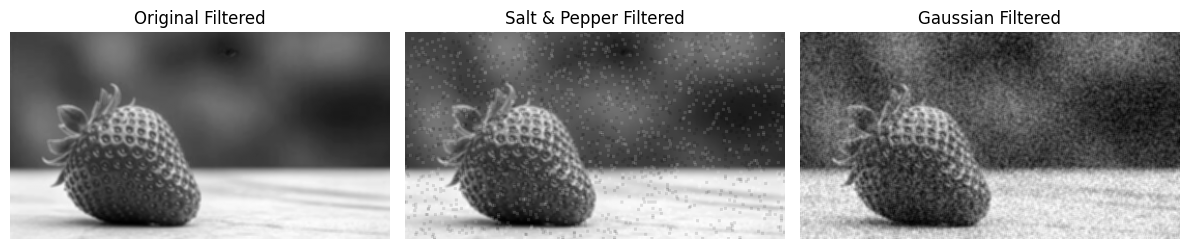

In [ ]:
# Applies a 3×3 mean filter to the original, salt & pepper, and Gaussian noise images
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

I = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
Isp = random_noise(I, mode='s&p', amount=0.03)
Isp = (Isp * 255).astype(np.uint8)
Ig = random_noise(I, mode='gaussian', var=0.02)
Ig = (Ig * 255).astype(np.uint8)

k = np.ones((3, 3), np.float32) / 9
Im = cv2.filter2D(I, -1, k)
Ispm = cv2.filter2D(Isp, -1, k)
Igm = cv2.filter2D(Ig, -1, k)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(Im, cmap='gray'), plt.title('Original Filtered'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(Ispm, cmap='gray'), plt.title('Salt & Pepper Filtered'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(Igm, cmap='gray'), plt.title('Gaussian Filtered'), plt.axis('off')
plt.tight_layout()
plt.show()


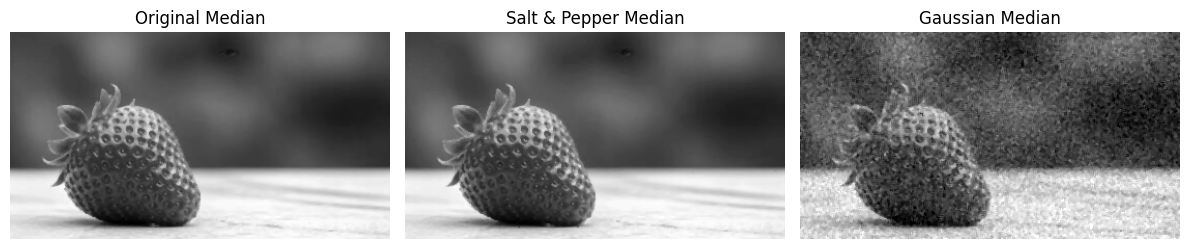

In [ ]:
# Applies a 3×3 median filter to the original, salt & pepper, and Gaussian noise images
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

I = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
Isp = (random_noise(I, mode='s&p', amount=0.03) * 255).astype(np.uint8)
Ig = (random_noise(I, mode='gaussian', var=0.02) * 255).astype(np.uint8)

Im = cv2.medianBlur(I, 3)
Ispm = cv2.medianBlur(Isp, 3)
Igm = cv2.medianBlur(Ig, 3)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(Im, cmap='gray'), plt.title('Original Median'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(Ispm, cmap='gray'), plt.title('Salt & Pepper Median'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(Igm, cmap='gray'), plt.title('Gaussian Median'), plt.axis('off')
plt.tight_layout()
plt.show()


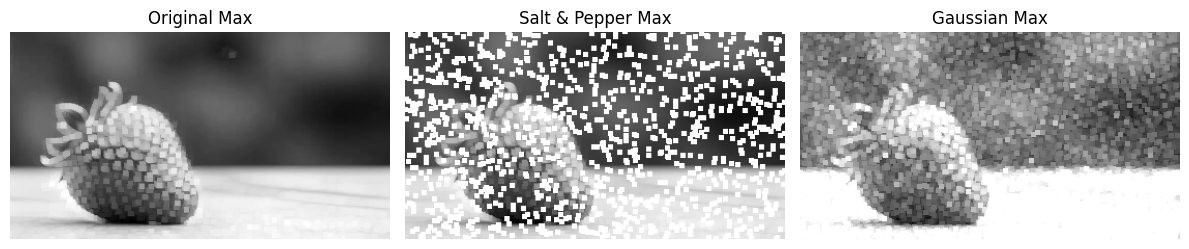

In [ ]:
# Applies a 5×5 max filter (25th order statistic) to the original, salt & pepper, and Gaussian noise images
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter
from skimage.util import random_noise

I = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
Isp = (random_noise(I, mode='s&p', amount=0.03) * 255).astype(np.uint8)
Ig = (random_noise(I, mode='gaussian', var=0.02) * 255).astype(np.uint8)

Im = maximum_filter(I, size=(5, 5))
Ispm = maximum_filter(Isp, size=(5, 5))
Igm = maximum_filter(Ig, size=(5, 5))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(Im, cmap='gray'), plt.title('Original Max'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(Ispm, cmap='gray'), plt.title('Salt & Pepper Max'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(Igm, cmap='gray'), plt.title('Gaussian Max'), plt.axis('off')
plt.tight_layout()
plt.show()


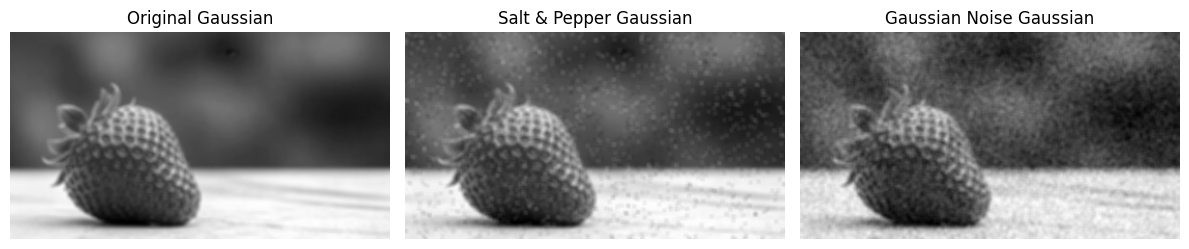

In [ ]:
# Applies a 5×5 Gaussian filter (σ=2) to the original, salt & pepper, and Gaussian noise images
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

I = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
Isp = (random_noise(I, mode='s&p', amount=0.03) * 255).astype(np.uint8)
Ig = (random_noise(I, mode='gaussian', var=0.02) * 255).astype(np.uint8)

Im = cv2.GaussianBlur(I, (5, 5), 2)
Ispm = cv2.GaussianBlur(Isp, (5, 5), 2)
Igm = cv2.GaussianBlur(Ig, (5, 5), 2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(Im, cmap='gray'), plt.title('Original Gaussian'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(Ispm, cmap='gray'), plt.title('Salt & Pepper Gaussian'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(Igm, cmap='gray'), plt.title('Gaussian Noise Gaussian'), plt.axis('off')
plt.tight_layout()
plt.show()


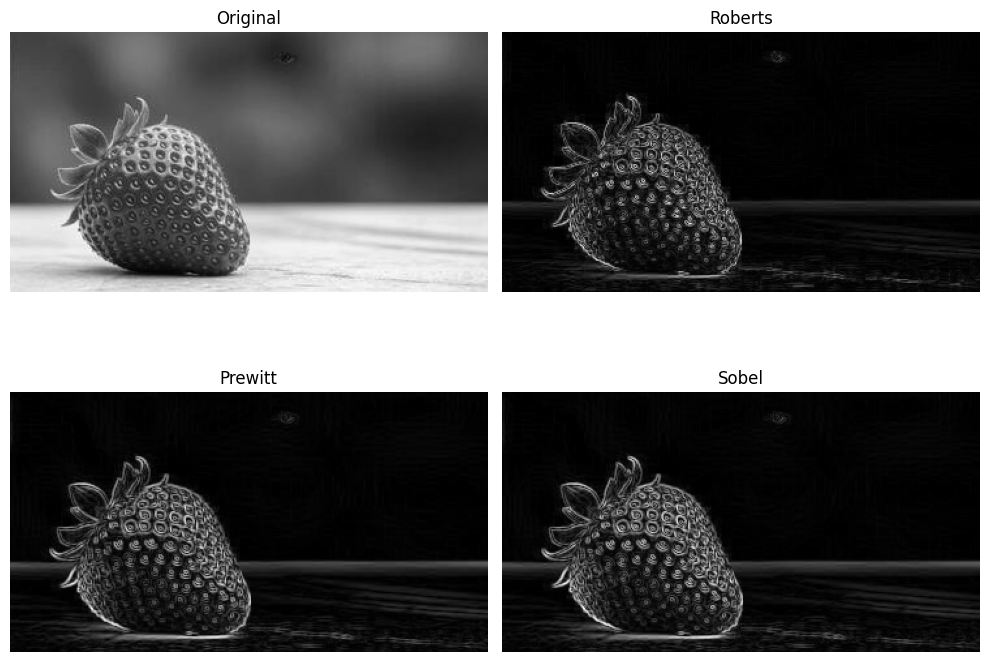

In [ ]:
# Applies Roberts, Prewitt, and Sobel edge detectors to a grayscale image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, io, color
from skimage.filters import sobel, prewitt, roberts

I = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)

IEr = roberts(I)
IEp = prewitt(I)
IEs = sobel(I)

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1), plt.imshow(I, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(IEr, cmap='gray'), plt.title('Roberts'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(IEp, cmap='gray'), plt.title('Prewitt'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(IEs, cmap='gray'), plt.title('Sobel'), plt.axis('off')
plt.tight_layout()
plt.show()


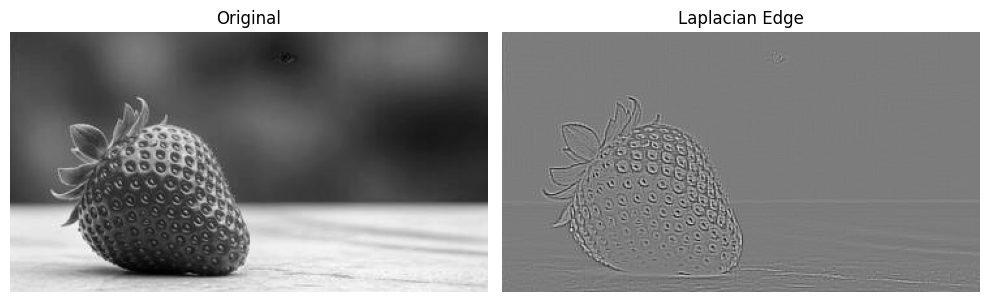

In [ ]:
# Applies a Laplacian filter to a grayscale version of the image and visualizes the signed response
import cv2
import numpy as np
import matplotlib.pyplot as plt

I = cv2.imread('1.jpg')
gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

laplacian = cv2.Laplacian(gray.astype(np.float64), cv2.CV_64F, ksize=3)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(gray, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian Edge'), plt.axis('off')
plt.tight_layout()
plt.show()


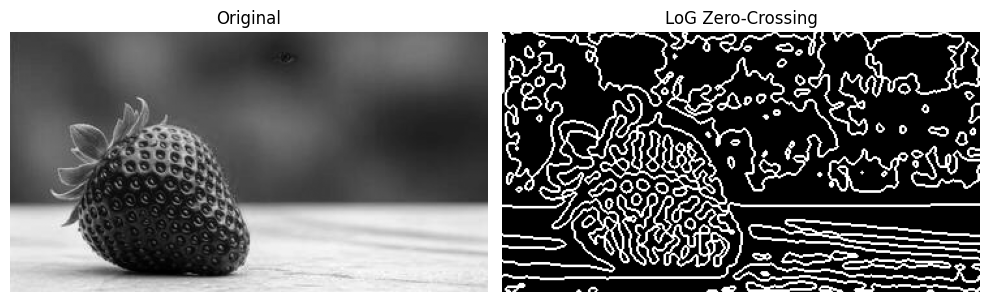

In [ ]:
# Applies Laplacian of Gaussian (LoG) and zero-crossing edge detection using scikit-image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian, laplace
from skimage.segmentation import find_boundaries

I = cv2.imread('1.jpg')
gray = rgb2gray(I)
blurred = gaussian(gray, sigma=3.0)
log_response = laplace(blurred)
edges = find_boundaries(log_response < 0, mode='thick')

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(gray, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(edges, cmap='gray'), plt.title('LoG Zero-Crossing'), plt.axis('off')
plt.tight_layout()
plt.show()


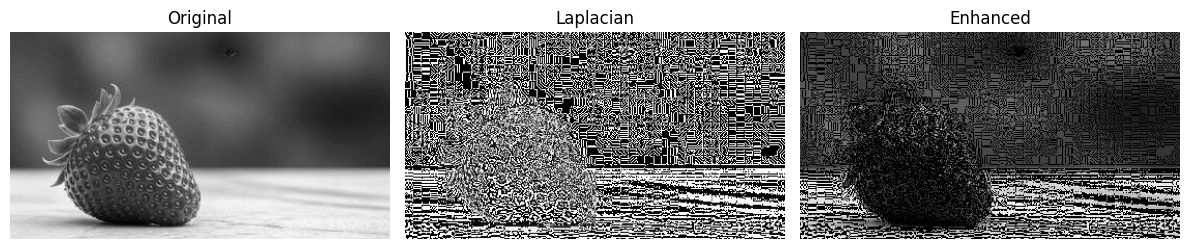

In [ ]:
# Applies Laplacian filter to enhance edges by subtracting the Laplacian from the original image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import laplace

A = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)

B = laplace(A)
C = cv2.subtract(A, B.astype(np.uint8))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(A, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(B, cmap='gray'), plt.title('Laplacian'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(C, cmap='gray'), plt.title('Enhanced'), plt.axis('off')
plt.tight_layout()
plt.show()


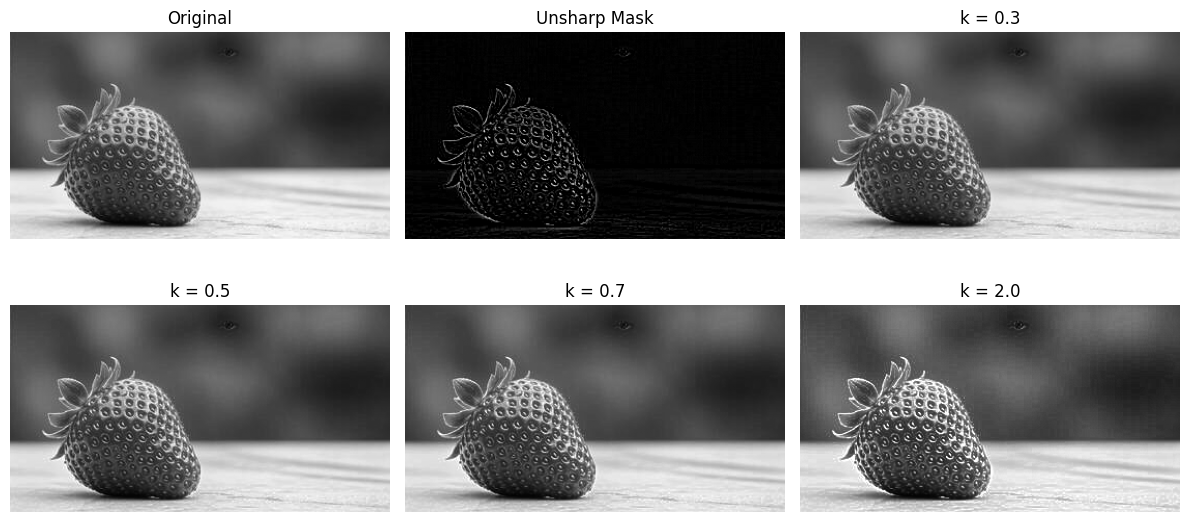

In [ ]:
# Performs unsharp masking by subtracting a Gaussian-blurred image from the original and adding scaled versions of the result
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

A = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
Iorig = A.copy()
g = gaussian_filter(Iorig, sigma=1.5)
Ie = cv2.subtract(Iorig, g.astype(np.uint8))

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1), plt.imshow(Iorig, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(2, 3, 2), plt.imshow(Ie, cmap='gray'), plt.title('Unsharp Mask'), plt.axis('off')

for idx, k in enumerate([0.3, 0.5, 0.7, 2.0], start=3):
    Iout = Iorig + (k * Ie)
    Iout = np.clip(Iout, 0, 255).astype(np.uint8)
    plt.subplot(2, 3, idx), plt.imshow(Iout, cmap='gray'), plt.title(f'k = {k}'), plt.axis('off')

plt.tight_layout()
plt.show()
